In [4]:
import polars as pl
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [5]:
df = pl.read_csv("data/customer_churn_telecom_services.csv")

## EDA

In [12]:
print(f"Dataframe shape: {df.shape}")
print("Column with missing values")
df.null_count()

Dataframe shape: (7043, 20)
Column with missing values


gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


Mean: 0.15295328695158078
Standard Deviation: 67.20277771005541


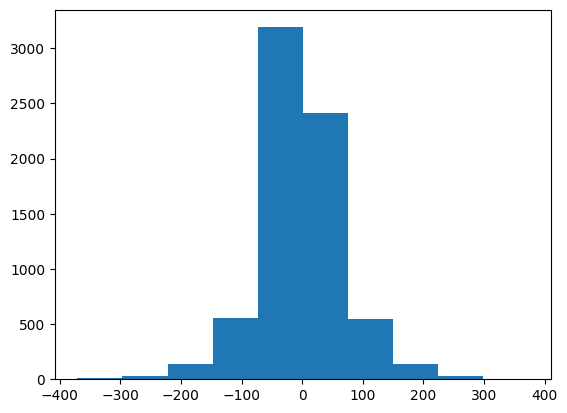

In [45]:
print(f"Mean: {(df.select(pl.col("TotalCharges"))- df.select((pl.col("tenure") * pl.col("MonthlyCharges"))))["TotalCharges"].mean()}")
print(f"Standard Deviation: {(df.select(pl.col("TotalCharges"))- df.select((pl.col("tenure") * pl.col("MonthlyCharges"))))["TotalCharges"].std()}")

plt.hist(np.array(df.select(pl.col("TotalCharges"))- df.select((pl.col("tenure") * pl.col("MonthlyCharges")))))
plt.show()

In [33]:
# fill missing values
df = df.fill_null(pl.col("tenure")*pl.col("MonthlyCharges"))

In [53]:
'''
Investigating the effect of monthly cost subject to seniority based on the assumption the it affects churn.
It looks like for the younger people, price is an important factor whether they want to stop their subcription or not.
After the modelling step we will perform feature importance, otherwise analysis such as conditional average treatment effect can be used to test the effec of monthly charges 
conditioned on seniority.
'''
df.group_by(["SeniorCitizen", "Churn"]).agg(
    pl.col("MonthlyCharges").mean().alias("mean"),
    pl.col("MonthlyCharges").std().alias("std"),
    pl.col("MonthlyCharges").median().alias("median"),
    pl.col("MonthlyCharges").min().alias("min"),
    pl.col("MonthlyCharges").max().alias("max"),
    pl.col("MonthlyCharges").count().alias("count")).sort(["SeniorCitizen", "Churn"])

SeniorCitizen,Churn,mean,std,median,min,max,count
f64,str,f64,f64,f64,f64,f64,u32
0.0,"""No""",58.618123,30.965375,59.75,18.25,118.75,4508
0.0,"""Yes""",72.298098,25.452247,78.1,18.85,118.35,1393
1.0,"""No""",79.182057,25.548785,84.85,18.95,117.35,666
1.0,"""Yes""",80.713445,21.007886,84.825,19.45,117.45,476


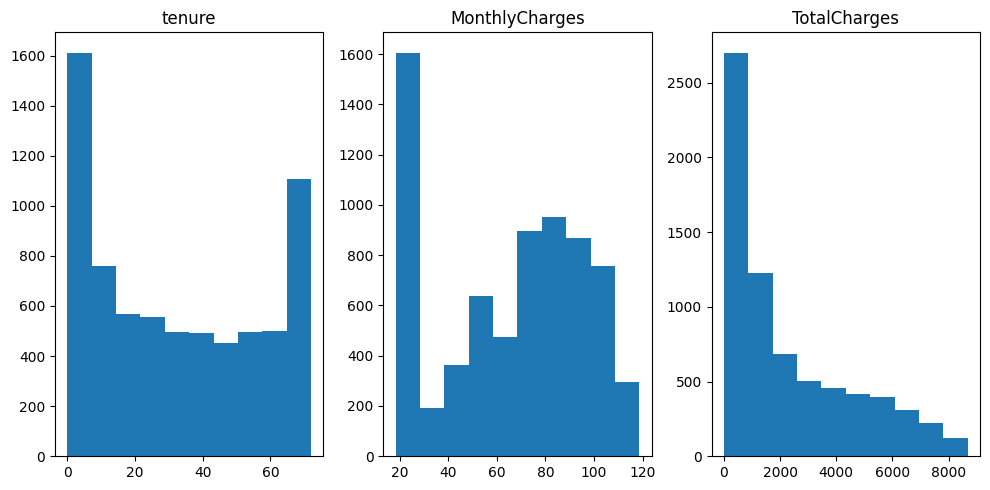

In [72]:
# distribution of relevant features
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
for i, col in enumerate(["tenure", "MonthlyCharges", "TotalCharges"]):
    axs[i].hist(np.array(df.select(pl.col(col))))
    axs[i].set_title(col)
plt.tight_layout()
plt.show()